Weekday or Weekend Prefernces and consumption behavior

In [ ]:
# Importing libraries and downloading the additional dataset user features like novelty and mainstreamness score
import pandas as pd
import numpy as np

df_additional = pd.read_csv('LFM-1b_users_additional.txt', delimiter='\t' )
df_additional


,user-id,novelty_artist_avg_month,novelty_artist_avg_6months,novelty_artist_avg_year,mainstreaminess_avg_month,mainstreaminess_avg_6months,mainstreaminess_avg_year,mainstreaminess_global,cnt_listeningevents,cnt_distinct_tracks,...,relative_le_per_hour14,relative_le_per_hour15,relative_le_per_hour16,relative_le_per_hour17,relative_le_per_hour18,relative_le_per_hour19,relative_le_per_hour20,relative_le_per_hour21,relative_le_per_hour22,relative_le_per_hour23
0,384,0.27662877856116547,0.044439,0.3094285950064659,0.024655,0.36734262481331825,0.000000,0.124903,17198,3601,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,1206,0.43722350196912885,0.109671,0.5137868970632553,0.181991,0.3913043439388275,0.000000,0.343855,17967,10990,...,0.0016,0.0115,0.0276,0.0662,0.079,0.0838,0.0995,0.1195,0.0968,0.0839
2,2622,0.6048279783555439,0.043923,0.6989826304571969,0.052310,0.7800639122724533,0.079669,0.245980,3939,3084,...,0.132,0.0493,0.0317,0.047,0.0658,0.1127,0.1112,0.068,0.0437,0.0254
3,2732,0.756972787635667,0.020071,0.8828014254570007,0.005092,0.8863636453946432,0.032614,0.077512,234,202,...,0.0598,0.0726,0.0171,0.0342,0.0769,0.1453,0.047,0.0513,0.0085,0.0128
4,3653,0.3800046739749389,0.045207,0.4244110181051142,0.042821,0.4917559259467655,0.077731,0.207567,18238,9839,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120317,50871714,0.4170865923166275,0.035417,0.5498878061771393,0.084304,0.6624909937381744,0.075544,0.160736,26932,6837,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641
120318,50900118,0.5663278949531642,0.032624,0.6803168281912804,0.049010,0.8278538286685944,0.103613,0.145418,7174,3970,...,0.0397,0.0431,0.0587,0.0733,0.0843,0.0764,0.0728,0.0643,0.0555,0.0452
120319,50931921,0.4831712218001485,0.032946,0.35164836049079895,0.038075,0.38235294818878174,0.012505,0.136102,998,676,...,0.0561,0.1172,0.1723,0.1062,0.0892,0.1092,0.0621,0.012,0.021,0.006
120320,50933471,0.5596322199950615,0.026570,0.5991988703608513,0.040033,0.6567867696285248,0.039335,0.175908,4152,2845,...,0.0417,0.0347,0.0294,0.0236,0.0508,0.0763,0.1086,0.1419,0.1387,0.1004


In [ ]:
# Filtering the user id and the relative listening events per day columns (1 to 7)
df_le_weekdays = df_additional[['user-id','relative_le_per_weekday1','relative_le_per_weekday2',
       'relative_le_per_weekday3', 'relative_le_per_weekday4',
       'relative_le_per_weekday5', 'relative_le_per_weekday6',
       'relative_le_per_weekday7']]
df_le_weekdays

,user-id,relative_le_per_weekday1,relative_le_per_weekday2,relative_le_per_weekday3,relative_le_per_weekday4,relative_le_per_weekday5,relative_le_per_weekday6,relative_le_per_weekday7
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443
1,1206,0.1679,0.185,0.1815,0.164,0.1542,0.07,0.0773
2,2622,0.1813,0.1318,0.1181,0.1442,0.1775,0.1084,0.1389
3,2732,0.0214,0.0726,0.094,0.2778,0.0171,0.2564,0.2607
4,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127
...,...,...,...,...,...,...,...,...
120317,50871714,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241
120318,50900118,0.1398,0.128,0.131,0.1469,0.145,0.1415,0.1678
120319,50931921,0.2695,0.0341,0.0932,0.1453,0.0611,0.0992,0.2976
120320,50933471,0.1419,0.1202,0.1525,0.1185,0.1373,0.1168,0.2129


In [ ]:
# Cleaning the data by checking for missing values and dropping the missing value rows

df = df_le_weekdays.replace('?',np.NaN)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))


for col in df.columns:
    print(col,df[col].isna().value_counts())

Number of instances = 120322
Number of attributes = 8
Number of missing values:
	user-id: 0
	relative_le_per_weekday1: 2402
	relative_le_per_weekday2: 2378
	relative_le_per_weekday3: 2217
	relative_le_per_weekday4: 2127
	relative_le_per_weekday5: 2054
	relative_le_per_weekday6: 4031
	relative_le_per_weekday7: 5164
user-id False    120322
Name: user-id, dtype: int64
relative_le_per_weekday1 False    117920
True       2402
Name: relative_le_per_weekday1, dtype: int64
relative_le_per_weekday2 False    117944
True       2378
Name: relative_le_per_weekday2, dtype: int64
relative_le_per_weekday3 False    118105
True       2217
Name: relative_le_per_weekday3, dtype: int64
relative_le_per_weekday4 False    118195
True       2127
Name: relative_le_per_weekday4, dtype: int64
relative_le_per_weekday5 False    118268
True       2054
Name: relative_le_per_weekday5, dtype: int64
relative_le_per_weekday6 False    116291
True       4031
Name: relative_le_per_weekday6, dtype: int64
relative_le_per_week

In [ ]:
df =df.dropna()
df

,user-id,relative_le_per_weekday1,relative_le_per_weekday2,relative_le_per_weekday3,relative_le_per_weekday4,relative_le_per_weekday5,relative_le_per_weekday6,relative_le_per_weekday7
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443
1,1206,0.1679,0.185,0.1815,0.164,0.1542,0.07,0.0773
2,2622,0.1813,0.1318,0.1181,0.1442,0.1775,0.1084,0.1389
3,2732,0.0214,0.0726,0.094,0.2778,0.0171,0.2564,0.2607
4,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127
...,...,...,...,...,...,...,...,...
120317,50871714,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241
120318,50900118,0.1398,0.128,0.131,0.1469,0.145,0.1415,0.1678
120319,50931921,0.2695,0.0341,0.0932,0.1453,0.0611,0.0992,0.2976
120320,50933471,0.1419,0.1202,0.1525,0.1185,0.1373,0.1168,0.2129


In [ ]:
# Renaming the columns with daywise labels from Mon to Sun and user_id label
le_labeled_daywise = df.rename (columns={'user-id':'user_id','relative_le_per_weekday1':'Mon','relative_le_per_weekday2':'Tue', 'relative_le_per_weekday3':'Wed',
                                       'relative_le_per_weekday4':'Thu', 'relative_le_per_weekday5':'Fri', 'relative_le_per_weekday6':'Sat',
                                       'relative_le_per_weekday7':'Sun' })

le_labeled_daywise

,user_id,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443
1,1206,0.1679,0.185,0.1815,0.164,0.1542,0.07,0.0773
2,2622,0.1813,0.1318,0.1181,0.1442,0.1775,0.1084,0.1389
3,2732,0.0214,0.0726,0.094,0.2778,0.0171,0.2564,0.2607
4,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127
...,...,...,...,...,...,...,...,...
120317,50871714,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241
120318,50900118,0.1398,0.128,0.131,0.1469,0.145,0.1415,0.1678
120319,50931921,0.2695,0.0341,0.0932,0.1453,0.0611,0.0992,0.2976
120320,50933471,0.1419,0.1202,0.1525,0.1185,0.1373,0.1168,0.2129


In [ ]:
# Downloading the dataset to be used for analysis
df_data_new = pd.read_csv('output_data_new.txt', delimiter='\t' )
df_data_new

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
1,3653,UK,31,m,18504,1041033600
2,4813,US,43,m,640,1050364800
3,5069,AT,30,m,31867,1051488000
4,6958,US,36,m,34788,1057536000
...,...,...,...,...,...,...
47581,50759670,US,25,m,467,1342153673
47582,50796677,PL,110,f,1495,1342344762
47583,50864998,PT,-1,m,74,1342696833
47584,50871714,BY,19,f,569,1342728447


In [ ]:
# Merging the analysis dataset and the realtive listening events dataset using user_id column
merged_df_users = pd.merge(le_labeled_daywise, df_data_new, on='user_id')
merged_df_users

,user_id,Mon,Tue,Wed,Thu,Fri,Sat,Sun,country,age,gender,playcount,registered_unixtime
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443,UK,35,m,42139,1035849600
1,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127,UK,31,m,18504,1041033600
2,4813,0.2154,0.1175,0.1164,0.2327,0.1002,0.0691,0.1486,US,43,m,640,1050364800
3,5069,0.1092,0.1881,0.1959,0.2123,0.2136,0.0701,0.0108,AT,30,m,31867,1051488000
4,6958,0.1587,0.129,0.1292,0.1663,0.0879,0.1452,0.1837,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46137,50673825,0.1383,0.1253,0.1372,0.141,0.1198,0.1735,0.1649,JP,43,m,39,1341630308
46138,50759670,0.1739,0.1444,0.1489,0.1464,0.1158,0.1336,0.1369,US,25,m,467,1342153673
46139,50796677,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326,PL,110,f,1495,1342344762
46140,50871714,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241,BY,19,f,569,1342728447


In [ ]:
# Filtering the female data
df_females = merged_df_users.loc[(merged_df_users.gender == 'f')]
df_females

,user_id,Mon,Tue,Wed,Thu,Fri,Sat,Sun,country,age,gender,playcount,registered_unixtime
6,10081,0.0597,0.0755,0.2138,0.2044,0.1226,0.1415,0.1824,DE,-1,f,256,1058054400
28,1009940,0.1687,0.1092,0.1283,0.1501,0.1209,0.1634,0.1595,NO,-1,f,5492,1057616875
41,1023672,0.1334,0.1371,0.1282,0.1334,0.1464,0.1611,0.1603,AU,24,f,50242,1073908193
49,1035006,0.2209,0.0722,0.075,0.0635,0.1163,0.1967,0.2554,UK,25,f,50681,1077470051
54,1039249,0.1491,0.1257,0.1307,0.1464,0.1452,0.1259,0.1771,DE,26,f,20254,1079296363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46129,50065812,0.1743,0.2234,0.1827,0.241,0.1413,0.026,0.0113,UK,25,f,1171,1338387932
46130,50067254,0.0447,0.1285,0.2514,0.1397,0.0782,0.3073,0.0503,PL,14,f,40,1338394398
46136,50081211,0.06,0.1446,0.127,0.1058,0.2383,0.2231,0.1012,ES,21,f,58,1338469348
46139,50796677,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326,PL,110,f,1495,1342344762


In [ ]:
# Selecting daywise female listening events for plotting and analysis
df_female_le = df_females [['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
df_female_le


,Mon,Tue,Wed,Thu,Fri,Sat,Sun
6,0.0597,0.0755,0.2138,0.2044,0.1226,0.1415,0.1824
28,0.1687,0.1092,0.1283,0.1501,0.1209,0.1634,0.1595
41,0.1334,0.1371,0.1282,0.1334,0.1464,0.1611,0.1603
49,0.2209,0.0722,0.075,0.0635,0.1163,0.1967,0.2554
54,0.1491,0.1257,0.1307,0.1464,0.1452,0.1259,0.1771
...,...,...,...,...,...,...,...
46129,0.1743,0.2234,0.1827,0.241,0.1413,0.026,0.0113
46130,0.0447,0.1285,0.2514,0.1397,0.0782,0.3073,0.0503
46136,0.06,0.1446,0.127,0.1058,0.2383,0.2231,0.1012
46139,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326


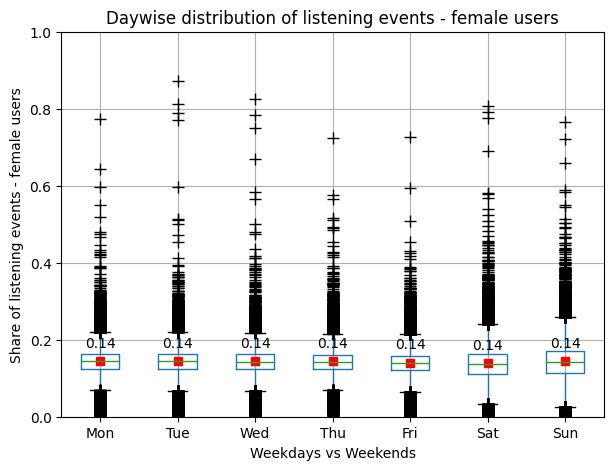

In [ ]:
# Plotting the daywise listening events distribution of female users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_daywise_f = df_female_le.apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(7, 5))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_daywise_f.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_daywise_f.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
    plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')

# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Daywise distribution of listening events - female users')
plt.xlabel('Weekdays vs Weekends')
plt.ylabel('Share of listening events - female users')

# Display the plot
plt.show()

In [ ]:
# Filtering the male data
df_males = merged_df_users.loc[(merged_df_users.gender == 'm')]
df_males

,user_id,Mon,Tue,Wed,Thu,Fri,Sat,Sun,country,age,gender,playcount,registered_unixtime
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443,UK,35,m,42139,1035849600
1,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127,UK,31,m,18504,1041033600
2,4813,0.2154,0.1175,0.1164,0.2327,0.1002,0.0691,0.1486,US,43,m,640,1050364800
3,5069,0.1092,0.1881,0.1959,0.2123,0.2136,0.0701,0.0108,AT,30,m,31867,1051488000
4,6958,0.1587,0.129,0.1292,0.1663,0.0879,0.1452,0.1837,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46134,50071634,0.1879,0.0238,0.1094,0.2202,0.202,0.1459,0.1108,US,60,m,83,1338412935
46135,50074234,0.1203,0.0609,0.1442,0.2174,0.2321,0.128,0.0971,US,35,m,212,1338426193
46137,50673825,0.1383,0.1253,0.1372,0.141,0.1198,0.1735,0.1649,JP,43,m,39,1341630308
46138,50759670,0.1739,0.1444,0.1489,0.1464,0.1158,0.1336,0.1369,US,25,m,467,1342153673


In [ ]:
# Selecting daywise male listening events for plotting and analysis
df_male_le = df_females [['Mon','Tue',
       'Wed','Thu','Fri',
       'Sat','Sun']]
df_male_le

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
6,0.0597,0.0755,0.2138,0.2044,0.1226,0.1415,0.1824
28,0.1687,0.1092,0.1283,0.1501,0.1209,0.1634,0.1595
41,0.1334,0.1371,0.1282,0.1334,0.1464,0.1611,0.1603
49,0.2209,0.0722,0.075,0.0635,0.1163,0.1967,0.2554
54,0.1491,0.1257,0.1307,0.1464,0.1452,0.1259,0.1771
...,...,...,...,...,...,...,...
46129,0.1743,0.2234,0.1827,0.241,0.1413,0.026,0.0113
46130,0.0447,0.1285,0.2514,0.1397,0.0782,0.3073,0.0503
46136,0.06,0.1446,0.127,0.1058,0.2383,0.2231,0.1012
46139,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326


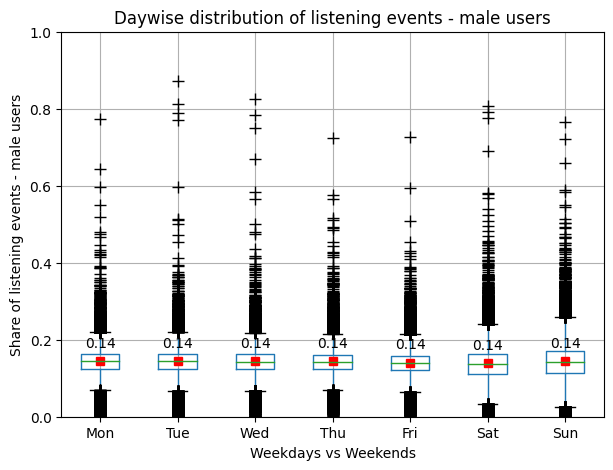

In [ ]:
# Plotting the daywise listening events distribution of male users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_daywise_m = df_male_le.apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(7, 5))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_daywise_m.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_daywise_m.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
    plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')

# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Daywise distribution of listening events - male users')
plt.xlabel('Weekdays vs Weekends')
plt.ylabel('Share of listening events - male users')

# Display the plot
plt.show()

In [ ]:
# Filtering all users - female & male
df_both_users = merged_df_users.loc[(merged_df_users.gender == 'm')|(merged_df_users.gender == 'f')]
df_both_users

,user_id,Mon,Tue,Wed,Thu,Fri,Sat,Sun,country,age,gender,playcount,registered_unixtime
0,384,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443,UK,35,m,42139,1035849600
1,3653,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127,UK,31,m,18504,1041033600
2,4813,0.2154,0.1175,0.1164,0.2327,0.1002,0.0691,0.1486,US,43,m,640,1050364800
3,5069,0.1092,0.1881,0.1959,0.2123,0.2136,0.0701,0.0108,AT,30,m,31867,1051488000
4,6958,0.1587,0.129,0.1292,0.1663,0.0879,0.1452,0.1837,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46137,50673825,0.1383,0.1253,0.1372,0.141,0.1198,0.1735,0.1649,JP,43,m,39,1341630308
46138,50759670,0.1739,0.1444,0.1489,0.1464,0.1158,0.1336,0.1369,US,25,m,467,1342153673
46139,50796677,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326,PL,110,f,1495,1342344762
46140,50871714,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241,BY,19,f,569,1342728447


In [ ]:
# Selecting daywise female & male listening events for plotting and analysis
df_all_le = df_both_users [['Mon','Tue',
       'Wed','Thu','Fri',
       'Sat','Sun']]
df_all_le

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0.1828,0.1513,0.1361,0.1252,0.1318,0.1286,0.1443
1,0.1164,0.1545,0.1316,0.138,0.158,0.1745,0.127
2,0.2154,0.1175,0.1164,0.2327,0.1002,0.0691,0.1486
3,0.1092,0.1881,0.1959,0.2123,0.2136,0.0701,0.0108
4,0.1587,0.129,0.1292,0.1663,0.0879,0.1452,0.1837
...,...,...,...,...,...,...,...
46137,0.1383,0.1253,0.1372,0.141,0.1198,0.1735,0.1649
46138,0.1739,0.1444,0.1489,0.1464,0.1158,0.1336,0.1369
46139,0.0793,0.151,0.0932,0.108,0.1227,0.2132,0.2326
46140,0.1765,0.1437,0.1091,0.1272,0.175,0.1444,0.1241


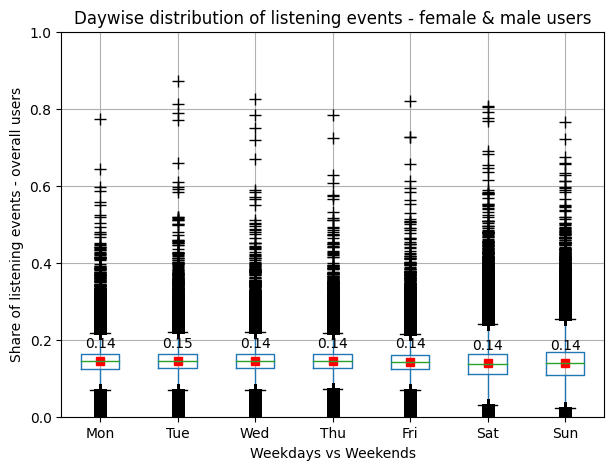

In [ ]:
# Plotting the daywise listening events distribution of female & male users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_daywise_both = df_all_le .apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(7, 5))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_daywise_both.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_daywise_both.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
    plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')


# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Daywise distribution of listening events - female & male users')
plt.xlabel('Weekdays vs Weekends')
plt.ylabel('Share of listening events - overall users')

# Display the plot
plt.show()

In [ ]:
#Loading the additional users feature dataframe
df_additional


,user-id,novelty_artist_avg_month,novelty_artist_avg_6months,novelty_artist_avg_year,mainstreaminess_avg_month,mainstreaminess_avg_6months,mainstreaminess_avg_year,mainstreaminess_global,cnt_listeningevents,cnt_distinct_tracks,...,relative_le_per_hour14,relative_le_per_hour15,relative_le_per_hour16,relative_le_per_hour17,relative_le_per_hour18,relative_le_per_hour19,relative_le_per_hour20,relative_le_per_hour21,relative_le_per_hour22,relative_le_per_hour23
0,384,0.27662877856116547,0.044439,0.3094285950064659,0.024655,0.36734262481331825,0.000000,0.124903,17198,3601,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,1206,0.43722350196912885,0.109671,0.5137868970632553,0.181991,0.3913043439388275,0.000000,0.343855,17967,10990,...,0.0016,0.0115,0.0276,0.0662,0.079,0.0838,0.0995,0.1195,0.0968,0.0839
2,2622,0.6048279783555439,0.043923,0.6989826304571969,0.052310,0.7800639122724533,0.079669,0.245980,3939,3084,...,0.132,0.0493,0.0317,0.047,0.0658,0.1127,0.1112,0.068,0.0437,0.0254
3,2732,0.756972787635667,0.020071,0.8828014254570007,0.005092,0.8863636453946432,0.032614,0.077512,234,202,...,0.0598,0.0726,0.0171,0.0342,0.0769,0.1453,0.047,0.0513,0.0085,0.0128
4,3653,0.3800046739749389,0.045207,0.4244110181051142,0.042821,0.4917559259467655,0.077731,0.207567,18238,9839,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120317,50871714,0.4170865923166275,0.035417,0.5498878061771393,0.084304,0.6624909937381744,0.075544,0.160736,26932,6837,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641
120318,50900118,0.5663278949531642,0.032624,0.6803168281912804,0.049010,0.8278538286685944,0.103613,0.145418,7174,3970,...,0.0397,0.0431,0.0587,0.0733,0.0843,0.0764,0.0728,0.0643,0.0555,0.0452
120319,50931921,0.4831712218001485,0.032946,0.35164836049079895,0.038075,0.38235294818878174,0.012505,0.136102,998,676,...,0.0561,0.1172,0.1723,0.1062,0.0892,0.1092,0.0621,0.012,0.021,0.006
120320,50933471,0.5596322199950615,0.026570,0.5991988703608513,0.040033,0.6567867696285248,0.039335,0.175908,4152,2845,...,0.0417,0.0347,0.0294,0.0236,0.0508,0.0763,0.1086,0.1419,0.1387,0.1004


listening events hour wise

In [ ]:
# Filtering the user id and the relative listening events per hour
df_le_hours = df_additional[['user-id','relative_le_per_hour0','relative_le_per_hour1','relative_le_per_hour2',
                             'relative_le_per_hour3', 'relative_le_per_hour4','relative_le_per_hour5', 'relative_le_per_hour6',
                             'relative_le_per_hour7', 'relative_le_per_hour8', 'relative_le_per_hour9','relative_le_per_hour10',
                             'relative_le_per_hour11','relative_le_per_hour12', 'relative_le_per_hour13','relative_le_per_hour14',
                             'relative_le_per_hour15','relative_le_per_hour16', 'relative_le_per_hour17','relative_le_per_hour18',
                              'relative_le_per_hour19','relative_le_per_hour20', 'relative_le_per_hour21','relative_le_per_hour22',
                             'relative_le_per_hour23']]
df_le_hours

,user-id,relative_le_per_hour0,relative_le_per_hour1,relative_le_per_hour2,relative_le_per_hour3,relative_le_per_hour4,relative_le_per_hour5,relative_le_per_hour6,relative_le_per_hour7,relative_le_per_hour8,...,relative_le_per_hour14,relative_le_per_hour15,relative_le_per_hour16,relative_le_per_hour17,relative_le_per_hour18,relative_le_per_hour19,relative_le_per_hour20,relative_le_per_hour21,relative_le_per_hour22,relative_le_per_hour23
0,384,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,1206,0.0539,0.0371,0.0321,0.0245,0.0322,0.0368,0.0366,0.046,0.0257,...,0.0016,0.0115,0.0276,0.0662,0.079,0.0838,0.0995,0.1195,0.0968,0.0839
2,2622,0.0074,0.0053,0.0036,0.0005,0.0003,0.0008,0.0003,0.0003,0.0008,...,0.132,0.0493,0.0317,0.047,0.0658,0.1127,0.1112,0.068,0.0437,0.0254
3,2732,?,?,?,?,?,?,?,?,0.0128,...,0.0598,0.0726,0.0171,0.0342,0.0769,0.1453,0.047,0.0513,0.0085,0.0128
4,3653,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120317,50871714,0.0568,0.044,0.0292,0.0197,0.0138,0.0111,0.0118,0.014,0.0176,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641
120318,50900118,0.0375,0.0162,0.0057,0.0163,0.0114,0.0121,0.0107,0.011,0.036,...,0.0397,0.0431,0.0587,0.0733,0.0843,0.0764,0.0728,0.0643,0.0555,0.0452
120319,50931921,?,0.001,?,?,?,?,?,?,?,...,0.0561,0.1172,0.1723,0.1062,0.0892,0.1092,0.0621,0.012,0.021,0.006
120320,50933471,0.0539,0.0349,0.0248,0.0084,0.0007,0.001,0.0022,?,?,...,0.0417,0.0347,0.0294,0.0236,0.0508,0.0763,0.1086,0.1419,0.1387,0.1004


In [ ]:
import numpy as np


re_le_hours = df_le_hours.replace('?',np.NaN)
print('Number of instances = %d' % (re_le_hours.shape[0]))
print('Number of attributes = %d' % (re_le_hours.shape[1]))


print('Number of missing values:')
for col in df_le_hours.columns:
    print('\t%s: %d' % (col,re_le_hours[col].isna().sum()))


for col in re_le_hours.columns:
    print(col,re_le_hours[col].isna().value_counts())


Number of instances = 120322
Number of attributes = 25
Number of missing values:
	user-id: 0
	relative_le_per_hour0: 11809
	relative_le_per_hour1: 16450
	relative_le_per_hour2: 21870
	relative_le_per_hour3: 26957
	relative_le_per_hour4: 31219
	relative_le_per_hour5: 33056
	relative_le_per_hour6: 32014
	relative_le_per_hour7: 28114
	relative_le_per_hour8: 24319
	relative_le_per_hour9: 21566
	relative_le_per_hour10: 20783
	relative_le_per_hour11: 20262
	relative_le_per_hour12: 19005
	relative_le_per_hour13: 16455
	relative_le_per_hour14: 13324
	relative_le_per_hour15: 10220
	relative_le_per_hour16: 7562
	relative_le_per_hour17: 5970
	relative_le_per_hour18: 5203
	relative_le_per_hour19: 5173
	relative_le_per_hour20: 5390
	relative_le_per_hour21: 6004
	relative_le_per_hour22: 6797
	relative_le_per_hour23: 8599
user-id False    120322
Name: user-id, dtype: int64
relative_le_per_hour0 False    108513
True      11809
Name: relative_le_per_hour0, dtype: int64
relative_le_per_hour1 False    10

In [ ]:
# Removing missing values from the data
re_le_hours = re_le_hours.dropna()

In [ ]:
# Renaming the columns with hourly labels from o to 23 and user_id label
labeled_re_le_hourly = re_le_hours.rename (columns={'user-id':'user_id','relative_le_per_hour0':'0','relative_le_per_hour1':'1','relative_le_per_hour2':'2',
                             'relative_le_per_hour3':'3', 'relative_le_per_hour4':'4','relative_le_per_hour5':'5', 'relative_le_per_hour6':'6',
                             'relative_le_per_hour7':'7', 'relative_le_per_hour8':'8', 'relative_le_per_hour9':'9','relative_le_per_hour10':'10',
                             'relative_le_per_hour11':'11','relative_le_per_hour12':'12', 'relative_le_per_hour13':'13','relative_le_per_hour14':'14',
                             'relative_le_per_hour15':'15','relative_le_per_hour16':'16', 'relative_le_per_hour17':'17','relative_le_per_hour18':'18',
                              'relative_le_per_hour19':'19','relative_le_per_hour20':'20', 'relative_le_per_hour21':'21','relative_le_per_hour22':'22',
                             'relative_le_per_hour23':'23' })
labeled_re_le_hourly

,user_id,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,384,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
2,2622,0.0074,0.0053,0.0036,0.0005,0.0003,0.0008,0.0003,0.0003,0.0008,...,0.132,0.0493,0.0317,0.047,0.0658,0.1127,0.1112,0.068,0.0437,0.0254
4,3653,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
7,5069,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,...,0.0085,0.0072,0.0072,0.0081,0.0274,0.0729,0.0974,0.0838,0.1095,0.1315
9,5834,0.0191,0.0101,0.0072,0.0049,0.0021,0.0012,0.0014,0.0006,0.0008,...,0.1072,0.1073,0.1128,0.1137,0.0656,0.0368,0.0307,0.035,0.0379,0.0267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120313,50759670,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,...,0.0126,0.0162,0.0183,0.0122,0.0127,0.0176,0.0251,0.0154,0.0281,0.0303
120314,50761770,0.0057,0.0057,0.0056,0.0059,0.0064,0.0061,0.0067,0.007,0.0608,...,0.1025,0.0941,0.0903,0.0288,0.0093,0.0098,0.0073,0.0073,0.006,0.0066
120317,50871714,0.0568,0.044,0.0292,0.0197,0.0138,0.0111,0.0118,0.014,0.0176,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641
120318,50900118,0.0375,0.0162,0.0057,0.0163,0.0114,0.0121,0.0107,0.011,0.036,...,0.0397,0.0431,0.0587,0.0733,0.0843,0.0764,0.0728,0.0643,0.0555,0.0452


In [ ]:
# Merging the analysis dataset and the hourly realtive listening events dataset using user_id column
merged_df_users_hourly = pd.merge(labeled_re_le_hourly, df_data_new, on='user_id')
merged_df_users_hourly

,user_id,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,country,age,gender,playcount,registered_unixtime
0,384,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,...,0.0298,0.0132,0.0007,0.0001,0.0151,UK,35,m,42139,1035849600
1,3653,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,...,0.0954,0.0833,0.0657,0.0471,0.0595,UK,31,m,18504,1041033600
2,5069,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,...,0.0729,0.0974,0.0838,0.1095,0.1315,AT,30,m,31867,1051488000
3,6958,0.0589,0.0629,0.0618,0.0594,0.0528,0.0459,0.0385,0.0359,0.0303,...,0.0429,0.049,0.0567,0.0607,0.0562,US,36,m,34788,1057536000
4,14308,0.0104,0.0037,0.0038,0.0026,0.0002,0.0008,0.001,0.0012,0.0007,...,0.1405,0.1345,0.1096,0.0705,0.0328,BR,31,m,70351,1058659200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29576,50074234,0.0486,0.037,0.0478,0.0316,0.0609,0.0432,0.0085,0.0093,0.0093,...,0.0663,0.0887,0.0995,0.1372,0.0763,US,35,m,212,1338426193
29577,50673825,0.0257,0.0401,0.0495,0.0548,0.0585,0.0574,0.0581,0.063,0.0667,...,0.0007,0.0007,0.0011,0.0031,0.013,JP,43,m,39,1341630308
29578,50759670,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,...,0.0176,0.0251,0.0154,0.0281,0.0303,US,25,m,467,1342153673
29579,50871714,0.0568,0.044,0.0292,0.0197,0.0138,0.0111,0.0118,0.014,0.0176,...,0.0573,0.0515,0.0551,0.0639,0.0641,BY,19,f,569,1342728447


In [ ]:
# Filtering overall users - female & male
df_both_users_hourly = merged_df_users_hourly.loc[(merged_df_users_hourly.gender == 'm')|(merged_df_users_hourly.gender == 'f')]
df_both_users_hourly

,user_id,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,country,age,gender,playcount,registered_unixtime
0,384,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,...,0.0298,0.0132,0.0007,0.0001,0.0151,UK,35,m,42139,1035849600
1,3653,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,...,0.0954,0.0833,0.0657,0.0471,0.0595,UK,31,m,18504,1041033600
2,5069,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,...,0.0729,0.0974,0.0838,0.1095,0.1315,AT,30,m,31867,1051488000
3,6958,0.0589,0.0629,0.0618,0.0594,0.0528,0.0459,0.0385,0.0359,0.0303,...,0.0429,0.049,0.0567,0.0607,0.0562,US,36,m,34788,1057536000
4,14308,0.0104,0.0037,0.0038,0.0026,0.0002,0.0008,0.001,0.0012,0.0007,...,0.1405,0.1345,0.1096,0.0705,0.0328,BR,31,m,70351,1058659200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29576,50074234,0.0486,0.037,0.0478,0.0316,0.0609,0.0432,0.0085,0.0093,0.0093,...,0.0663,0.0887,0.0995,0.1372,0.0763,US,35,m,212,1338426193
29577,50673825,0.0257,0.0401,0.0495,0.0548,0.0585,0.0574,0.0581,0.063,0.0667,...,0.0007,0.0007,0.0011,0.0031,0.013,JP,43,m,39,1341630308
29578,50759670,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,...,0.0176,0.0251,0.0154,0.0281,0.0303,US,25,m,467,1342153673
29579,50871714,0.0568,0.044,0.0292,0.0197,0.0138,0.0111,0.0118,0.014,0.0176,...,0.0573,0.0515,0.0551,0.0639,0.0641,BY,19,f,569,1342728447


In [ ]:
# Selecting hourly overall - female & male listening events for plotting and analysis
df_all_le_hourly = df_both_users_hourly [['0','1','2','3','4','5','6','7','8','9',
'10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
df_all_le_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,0.0012,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,0.0206,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
2,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,0.0008,...,0.0085,0.0072,0.0072,0.0081,0.0274,0.0729,0.0974,0.0838,0.1095,0.1315
3,0.0589,0.0629,0.0618,0.0594,0.0528,0.0459,0.0385,0.0359,0.0303,0.0233,...,0.0256,0.0231,0.0367,0.0461,0.0445,0.0429,0.049,0.0567,0.0607,0.0562
4,0.0104,0.0037,0.0038,0.0026,0.0002,0.0008,0.001,0.0012,0.0007,0.0008,...,0.0748,0.0903,0.0848,0.0755,0.0981,0.1405,0.1345,0.1096,0.0705,0.0328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29576,0.0486,0.037,0.0478,0.0316,0.0609,0.0432,0.0085,0.0093,0.0093,0.0039,...,0.0362,0.0123,0.0463,0.0316,0.0208,0.0663,0.0887,0.0995,0.1372,0.0763
29577,0.0257,0.0401,0.0495,0.0548,0.0585,0.0574,0.0581,0.063,0.0667,0.0691,...,0.067,0.0469,0.0197,0.0045,0.0017,0.0007,0.0007,0.0011,0.0031,0.013
29578,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,0.0391,...,0.0126,0.0162,0.0183,0.0122,0.0127,0.0176,0.0251,0.0154,0.0281,0.0303
29579,0.0568,0.044,0.0292,0.0197,0.0138,0.0111,0.0118,0.014,0.0176,0.0265,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641


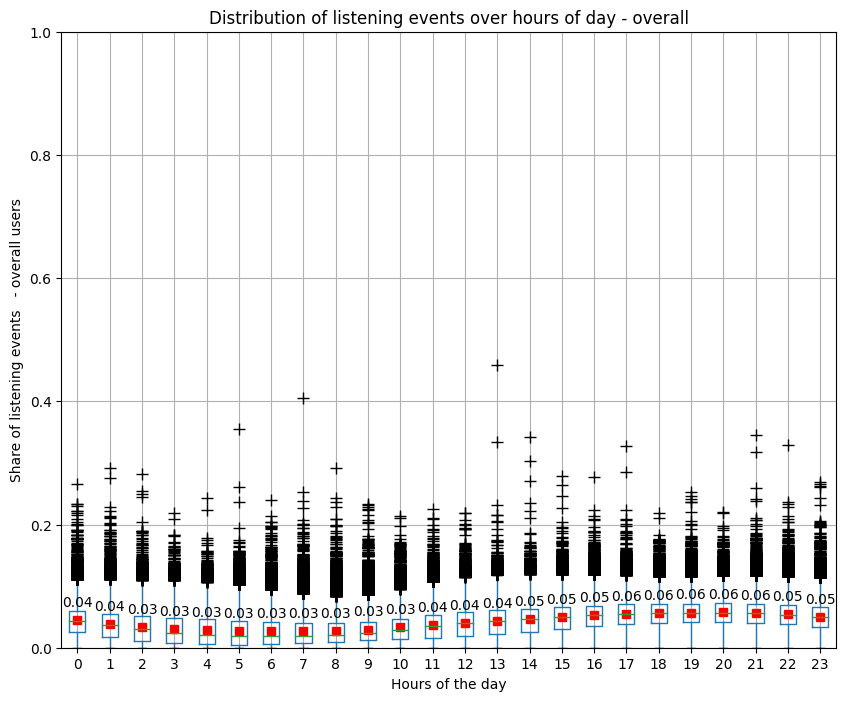

In [ ]:
# Plotting the daywise listening events distribution of overall -female & male users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_hourly_both = df_all_le_hourly .apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(10, 8))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_hourly_both.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_hourly_both.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
     plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')

# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Distribution of listening events over hours of day - overall')
plt.xlabel('Hours of the day')
plt.ylabel('Share of listening events   - overall users')

# Display the plot
plt.show()

In [ ]:
# Filtering all users - female
df_fem_users_hourly = merged_df_users_hourly.loc[(merged_df_users_hourly.gender == 'f')]
df_fem_users_hourly

,user_id,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,country,age,gender,playcount,registered_unixtime
22,1009940,0.0376,0.0169,0.0074,0.0046,0.0039,0.0004,0.0059,0.0174,0.0133,...,0.0811,0.0888,0.0743,0.0697,0.0615,NO,-1,f,5492,1057616875
31,1023672,0.0446,0.0626,0.076,0.0827,0.0841,0.0832,0.0862,0.0819,0.0719,...,0.0014,0.0017,0.0033,0.0151,0.0215,AU,24,f,50242,1073908193
40,1039249,0.0158,0.0076,0.0037,0.0025,0.0017,0.0001,0.0014,0.0065,0.0138,...,0.0819,0.1066,0.0931,0.0553,0.0315,DE,26,f,20254,1079296363
43,1040586,0.0042,0.0041,0.0039,0.0039,0.0044,0.0047,0.0172,0.0444,0.054,...,0.0202,0.0201,0.0233,0.0178,0.0084,RU,29,f,48872,1079623684
47,1042860,0.0223,0.016,0.009,0.0066,0.0059,0.0041,0.0022,0.0033,0.0056,...,0.0373,0.0433,0.0503,0.0448,0.0368,NL,47,f,54186,1080168885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29557,50011456,0.0174,0.0031,0.0011,0.0003,0.0005,0.0005,0.0007,0.0001,0.0053,...,0.0769,0.0872,0.109,0.1168,0.067,LT,19,f,4679,1338110858
29565,50029612,0.042,0.0366,0.0344,0.0322,0.0325,0.0325,0.0325,0.0331,0.0328,...,0.0417,0.0395,0.0574,0.0574,0.0628,PL,18,f,1397,1338202319
29566,50035568,0.0429,0.0321,0.0131,0.0055,0.0003,0.0008,0.0015,0.0122,0.0167,...,0.0743,0.08,0.0894,0.0962,0.078,PL,16,f,1415,1338227977
29567,50038181,0.0526,0.0556,0.1023,0.1374,0.0322,0.0058,0.0058,0.0058,0.0058,...,0.0468,0.0409,0.0292,0.0439,0.0556,ZA,21,f,788,1338237798


In [ ]:
# Selecting hourly female listening events for plotting and analysis
df_fem_le_hourly = df_fem_users_hourly [['0','1','2','3','4','5','6','7','8','9',
'10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
df_fem_le_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
22,0.0376,0.0169,0.0074,0.0046,0.0039,0.0004,0.0059,0.0174,0.0133,0.0134,...,0.0519,0.0658,0.0742,0.0862,0.0963,0.0811,0.0888,0.0743,0.0697,0.0615
31,0.0446,0.0626,0.076,0.0827,0.0841,0.0832,0.0862,0.0819,0.0719,0.0609,...,0.0153,0.0047,0.0024,0.002,0.0016,0.0014,0.0017,0.0033,0.0151,0.0215
40,0.0158,0.0076,0.0037,0.0025,0.0017,0.0001,0.0014,0.0065,0.0138,0.0171,...,0.066,0.0669,0.0781,0.0861,0.0772,0.0819,0.1066,0.0931,0.0553,0.0315
43,0.0042,0.0041,0.0039,0.0039,0.0044,0.0047,0.0172,0.0444,0.054,0.0859,...,0.089,0.0738,0.0737,0.0413,0.0278,0.0202,0.0201,0.0233,0.0178,0.0084
47,0.0223,0.016,0.009,0.0066,0.0059,0.0041,0.0022,0.0033,0.0056,0.0405,...,0.0864,0.0787,0.0727,0.0544,0.0145,0.0373,0.0433,0.0503,0.0448,0.0368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29557,0.0174,0.0031,0.0011,0.0003,0.0005,0.0005,0.0007,0.0001,0.0053,0.0184,...,0.0595,0.0531,0.0542,0.0645,0.0699,0.0769,0.0872,0.109,0.1168,0.067
29565,0.042,0.0366,0.0344,0.0322,0.0325,0.0325,0.0325,0.0331,0.0328,0.03,...,0.0489,0.041,0.041,0.0423,0.0423,0.0417,0.0395,0.0574,0.0574,0.0628
29566,0.0429,0.0321,0.0131,0.0055,0.0003,0.0008,0.0015,0.0122,0.0167,0.0136,...,0.053,0.0502,0.0545,0.0627,0.0649,0.0743,0.08,0.0894,0.0962,0.078
29567,0.0526,0.0556,0.1023,0.1374,0.0322,0.0058,0.0058,0.0058,0.0058,0.0117,...,0.0789,0.0263,0.0088,0.0556,0.0205,0.0468,0.0409,0.0292,0.0439,0.0556


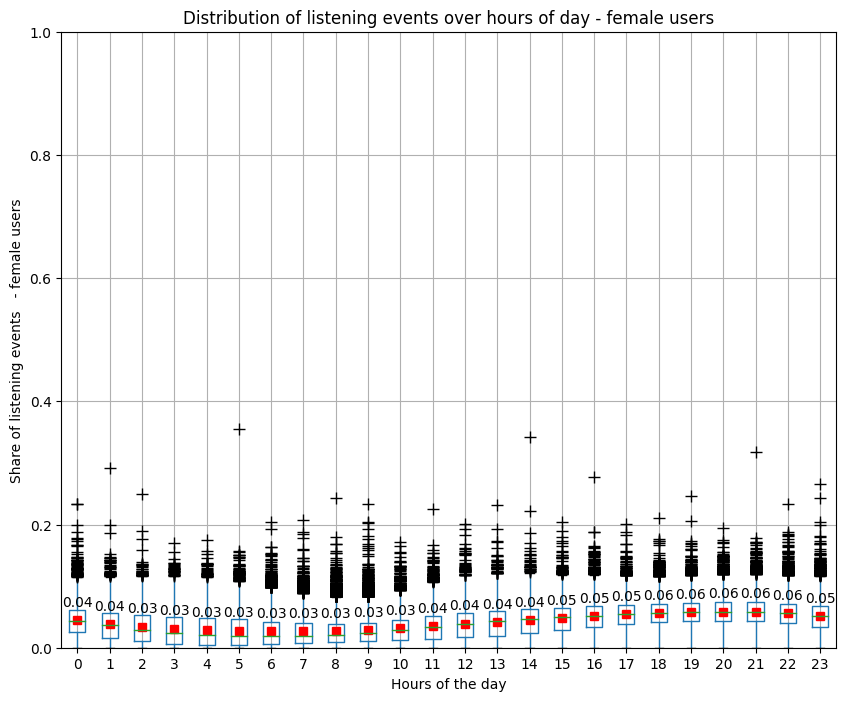

In [ ]:
# Plotting the daywise listening events distribution of female users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_hourly_fem = df_fem_le_hourly .apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(10, 8))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_hourly_fem.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_hourly_fem.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
    plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')

# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Distribution of listening events over hours of day - female users')
plt.xlabel('Hours of the day')
plt.ylabel('Share of listening events   - female users')

# Display the plot
plt.show()

In [ ]:
# Filtering all users -  male
df_male_users_hourly = merged_df_users_hourly.loc[(merged_df_users_hourly.gender == 'm')]
df_male_users_hourly

,user_id,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,country,age,gender,playcount,registered_unixtime
0,384,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,...,0.0298,0.0132,0.0007,0.0001,0.0151,UK,35,m,42139,1035849600
1,3653,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,...,0.0954,0.0833,0.0657,0.0471,0.0595,UK,31,m,18504,1041033600
2,5069,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,...,0.0729,0.0974,0.0838,0.1095,0.1315,AT,30,m,31867,1051488000
3,6958,0.0589,0.0629,0.0618,0.0594,0.0528,0.0459,0.0385,0.0359,0.0303,...,0.0429,0.049,0.0567,0.0607,0.0562,US,36,m,34788,1057536000
4,14308,0.0104,0.0037,0.0038,0.0026,0.0002,0.0008,0.001,0.0012,0.0007,...,0.1405,0.1345,0.1096,0.0705,0.0328,BR,31,m,70351,1058659200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,50071075,0.0463,0.0527,0.0738,0.0431,0.0477,0.0631,0.0607,0.0367,0.046,...,0.047,0.0394,0.0455,0.058,0.0607,US,-1,m,567,1338410227
29576,50074234,0.0486,0.037,0.0478,0.0316,0.0609,0.0432,0.0085,0.0093,0.0093,...,0.0663,0.0887,0.0995,0.1372,0.0763,US,35,m,212,1338426193
29577,50673825,0.0257,0.0401,0.0495,0.0548,0.0585,0.0574,0.0581,0.063,0.0667,...,0.0007,0.0007,0.0011,0.0031,0.013,JP,43,m,39,1341630308
29578,50759670,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,...,0.0176,0.0251,0.0154,0.0281,0.0303,US,25,m,467,1342153673


In [ ]:
# Selecting hourly male listening events for plotting and analysis
df_male_le_hourly = df_male_users_hourly [['0','1','2','3','4','5','6','7','8','9',
'10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
df_male_le_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.085,0.1169,0.1101,0.0984,0.0781,0.05,0.0145,0.0051,0.0006,0.0012,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,0.0612,0.0392,0.0249,0.025,0.0169,0.0105,0.0088,0.0063,0.0086,0.0206,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
2,0.1348,0.1154,0.077,0.0497,0.0236,0.0121,0.0065,0.0027,0.0021,0.0008,...,0.0085,0.0072,0.0072,0.0081,0.0274,0.0729,0.0974,0.0838,0.1095,0.1315
3,0.0589,0.0629,0.0618,0.0594,0.0528,0.0459,0.0385,0.0359,0.0303,0.0233,...,0.0256,0.0231,0.0367,0.0461,0.0445,0.0429,0.049,0.0567,0.0607,0.0562
4,0.0104,0.0037,0.0038,0.0026,0.0002,0.0008,0.001,0.0012,0.0007,0.0008,...,0.0748,0.0903,0.0848,0.0755,0.0981,0.1405,0.1345,0.1096,0.0705,0.0328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,0.0463,0.0527,0.0738,0.0431,0.0477,0.0631,0.0607,0.0367,0.046,0.0426,...,0.0243,0.0217,0.0233,0.0342,0.0453,0.047,0.0394,0.0455,0.058,0.0607
29576,0.0486,0.037,0.0478,0.0316,0.0609,0.0432,0.0085,0.0093,0.0093,0.0039,...,0.0362,0.0123,0.0463,0.0316,0.0208,0.0663,0.0887,0.0995,0.1372,0.0763
29577,0.0257,0.0401,0.0495,0.0548,0.0585,0.0574,0.0581,0.063,0.0667,0.0691,...,0.067,0.0469,0.0197,0.0045,0.0017,0.0007,0.0007,0.0011,0.0031,0.013
29578,0.0345,0.0452,0.0617,0.0907,0.1113,0.1185,0.1108,0.0938,0.0653,0.0391,...,0.0126,0.0162,0.0183,0.0122,0.0127,0.0176,0.0251,0.0154,0.0281,0.0303


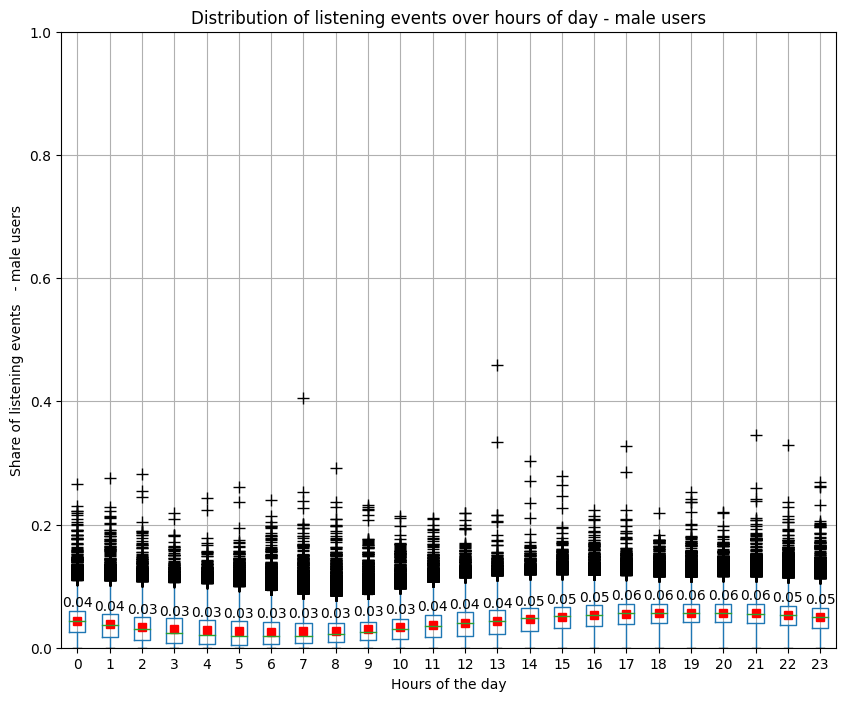

In [ ]:
# Plotting the daywise listening events distribution of female users
import pandas as pd
import matplotlib.pyplot as plt


# Convert object columns to numeric
df_hourly_male = df_male_le_hourly .apply(pd.to_numeric)

# Set the figure size
plt.figure(figsize=(10, 8))


# Plot box plots with marker='+' and outlier color='blue'
boxplot_props = dict(marker='+', markerfacecolor='blue', markersize=8)
df_hourly_male.boxplot(flierprops=boxplot_props)

# Calculate the mean
mean_values = df_hourly_male.mean()

# Add mean values as points
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='s', color='r', linestyle='None')

# Add labels to the mean points
for i, mean in enumerate(mean_values):
    plt.annotate(f'{mean:.2f}', (i + 1, mean), textcoords="offset points", xytext=(0, 10), ha='center')

# Set y-axis limits
plt.ylim(0.0, 1.0)


# Add title and axis labels
plt.title('Distribution of listening events over hours of day - male users')
plt.xlabel('Hours of the day')
plt.ylabel('Share of listening events   - male users')

# Display the plot
plt.show()

In [ ]:
# Downloading the novelty and mainstreaminess score computed on window of 12 months
df_score = df_additional[['user-id','novelty_artist_avg_year','mainstreaminess_avg_year']]
df_score

,user-id,novelty_artist_avg_year,mainstreaminess_avg_year
0,384,0.3094285950064659,0.000000
1,1206,0.5137868970632553,0.000000
2,2622,0.6989826304571969,0.079669
3,2732,0.8828014254570007,0.032614
4,3653,0.4244110181051142,0.077731
...,...,...,...
120317,50871714,0.5498878061771393,0.075544
120318,50900118,0.6803168281912804,0.103613
120319,50931921,0.35164836049079895,0.012505
120320,50933471,0.5991988703608513,0.039335


In [ ]:
# Renaming 'user-id' column to 'user_id'
df_score = df_score.rename(columns={'user-id' :'user_id' })
df_score

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year
0,384,0.3094285950064659,0.000000
1,1206,0.5137868970632553,0.000000
2,2622,0.6989826304571969,0.079669
3,2732,0.8828014254570007,0.032614
4,3653,0.4244110181051142,0.077731
...,...,...,...
120317,50871714,0.5498878061771393,0.075544
120318,50900118,0.6803168281912804,0.103613
120319,50931921,0.35164836049079895,0.012505
120320,50933471,0.5991988703608513,0.039335


In [ ]:
# Data preprocessing - chceking for missing values
import numpy as np


df_score = df_score.replace('?',np.NaN)
print('Number of instances = %d' % (df_score.shape[0]))
print('Number of attributes = %d' % (df_score.shape[1]))


print('Number of missing values:')
for col in df_score.columns:
    print('\t%s: %d' % (col,df_score[col].isna().sum()))


for col in df_score.columns:
    print(col,df_score[col].isna().value_counts())

Number of instances = 120322
Number of attributes = 3
Number of missing values:
	user_id: 0
	novelty_artist_avg_year: 7530
	mainstreaminess_avg_year: 0
user_id False    120322
Name: user_id, dtype: int64
novelty_artist_avg_year False    112792
True       7530
Name: novelty_artist_avg_year, dtype: int64
mainstreaminess_avg_year False    120322
Name: mainstreaminess_avg_year, dtype: int64


In [ ]:
# Removing the mising values from the data
df_score_cl=df_score.dropna()
# Checking data type to execute numeric calculations
data_type = df_score_cl.dtypes
print(data_type)

user_id                       int64
novelty_artist_avg_year      object
mainstreaminess_avg_year    float64
dtype: object


In [ ]:
# Converting columns to numeric
df_score_cl = df_score_cl .apply(pd.to_numeric)
df_score_cl

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year
0,384,0.309429,0.000000
1,1206,0.513787,0.000000
2,2622,0.698983,0.079669
3,2732,0.882801,0.032614
4,3653,0.424411,0.077731
...,...,...,...
120317,50871714,0.549888,0.075544
120318,50900118,0.680317,0.103613
120319,50931921,0.351648,0.012505
120320,50933471,0.599199,0.039335


In [ ]:
# Merging the analysis dataset and the novelty and mainstreaminess  scores
df_merged_score = pd.merge(df_score_cl, df_data_new , on='user_id')
df_merged_score

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year,country,age,gender,playcount,registered_unixtime
0,384,0.309429,0.000000,UK,35,m,42139,1035849600
1,3653,0.424411,0.077731,UK,31,m,18504,1041033600
2,4813,0.907891,0.007011,US,43,m,640,1050364800
3,5069,0.552692,0.057478,AT,30,m,31867,1051488000
4,6958,0.460354,0.007506,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...
46206,50673825,0.431379,0.034846,JP,43,m,39,1341630308
46207,50759670,0.239111,0.178529,US,25,m,467,1342153673
46208,50796677,0.484848,0.000000,PL,110,f,1495,1342344762
46209,50871714,0.549888,0.075544,BY,19,f,569,1342728447


In [ ]:
# Filtered only females from gender column
df_merged_score_fem = df_merged_score.loc[(df_merged_score.gender == 'f')]
df_merged_score_fem

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year,country,age,gender,playcount,registered_unixtime
6,10081,0.792255,0.032683,DE,-1,f,256,1058054400
28,1009940,0.529377,0.031884,NO,-1,f,5492,1057616875
41,1023672,0.461482,0.100624,AU,24,f,50242,1073908193
49,1035006,0.298606,0.076825,UK,25,f,50681,1077470051
54,1039249,0.400041,0.055447,DE,26,f,20254,1079296363
...,...,...,...,...,...,...,...,...
46195,50067254,0.842199,0.065499,PL,14,f,40,1338394398
46204,50077367,0.500000,0.000000,BR,21,f,161,1338445489
46205,50081211,0.658883,0.119336,ES,21,f,58,1338469348
46208,50796677,0.484848,0.000000,PL,110,f,1495,1342344762


In [ ]:
# Selecting required score column for female data
df_merged_score_fem = df_merged_score_fem.loc[:,['novelty_artist_avg_year','mainstreaminess_avg_year']]
df_merged_score_fem


,novelty_artist_avg_year,mainstreaminess_avg_year
6,0.792255,0.032683
28,0.529377,0.031884
41,0.461482,0.100624
49,0.298606,0.076825
54,0.400041,0.055447
...,...,...
46195,0.842199,0.065499
46204,0.500000,0.000000
46205,0.658883,0.119336
46208,0.484848,0.000000


In [ ]:
# Calculating score statistics for female users
statistics_fem = df_merged_score_fem.describe()
statistics_fem

,novelty_artist_avg_year,mainstreaminess_avg_year
count,13059.000000,13059.000000
mean,0.450168,0.060659
std,0.186046,0.046368
min,0.000000,0.000000
25%,0.318318,0.026549
50%,0.432069,0.053667
75%,0.565075,0.086320
max,1.000000,0.313967


In [ ]:
# Filtered only males from gender column
df_merged_score_male = df_merged_score.loc[(df_merged_score.gender == 'm')]
df_merged_score_male

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year,country,age,gender,playcount,registered_unixtime
0,384,0.309429,0.000000,UK,35,m,42139,1035849600
1,3653,0.424411,0.077731,UK,31,m,18504,1041033600
2,4813,0.907891,0.007011,US,43,m,640,1050364800
3,5069,0.552692,0.057478,AT,30,m,31867,1051488000
4,6958,0.460354,0.007506,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...
46202,50073544,0.500000,0.057404,BR,17,m,57,1338422441
46203,50074234,0.421153,0.003115,US,35,m,212,1338426193
46206,50673825,0.431379,0.034846,JP,43,m,39,1341630308
46207,50759670,0.239111,0.178529,US,25,m,467,1342153673


In [ ]:
# Selecting required score column for male data
df_merged_score_male = df_merged_score_male.loc[:,['novelty_artist_avg_year','mainstreaminess_avg_year']]
df_merged_score_male

,novelty_artist_avg_year,mainstreaminess_avg_year
0,0.309429,0.000000
1,0.424411,0.077731
2,0.907891,0.007011
3,0.552692,0.057478
4,0.460354,0.007506
...,...,...
46202,0.500000,0.057404
46203,0.421153,0.003115
46206,0.431379,0.034846
46207,0.239111,0.178529


In [ ]:
# Calculating score statistics for male users
statistics_male = df_merged_score_male.describe()
statistics_male

,novelty_artist_avg_year,mainstreaminess_avg_year
count,33152.000000,33152.000000
mean,0.461438,0.058738
std,0.186732,0.045640
min,0.000000,0.000000
25%,0.327526,0.026040
50%,0.448542,0.050945
75%,0.580612,0.082680
max,1.000000,0.393034


In [ ]:
# Filtered females & males from gender column
df_merged_score_both = df_merged_score.loc[(df_merged_score.gender == 'f')| (df_merged_score.gender == 'm')]
df_merged_score_both

,user_id,novelty_artist_avg_year,mainstreaminess_avg_year,country,age,gender,playcount,registered_unixtime
0,384,0.309429,0.000000,UK,35,m,42139,1035849600
1,3653,0.424411,0.077731,UK,31,m,18504,1041033600
2,4813,0.907891,0.007011,US,43,m,640,1050364800
3,5069,0.552692,0.057478,AT,30,m,31867,1051488000
4,6958,0.460354,0.007506,US,36,m,34788,1057536000
...,...,...,...,...,...,...,...,...
46206,50673825,0.431379,0.034846,JP,43,m,39,1341630308
46207,50759670,0.239111,0.178529,US,25,m,467,1342153673
46208,50796677,0.484848,0.000000,PL,110,f,1495,1342344762
46209,50871714,0.549888,0.075544,BY,19,f,569,1342728447


In [ ]:
# Selecting required score column for overall - female & male data
df_merged_score_both = df_merged_score_both.loc[:,['novelty_artist_avg_year','mainstreaminess_avg_year']]
df_merged_score_both

,novelty_artist_avg_year,mainstreaminess_avg_year
0,0.309429,0.000000
1,0.424411,0.077731
2,0.907891,0.007011
3,0.552692,0.057478
4,0.460354,0.007506
...,...,...
46206,0.431379,0.034846
46207,0.239111,0.178529
46208,0.484848,0.000000
46209,0.549888,0.075544


In [ ]:
# Calculating score statistics for overall - female & male users
statistics_both = df_merged_score_both.describe()
statistics_both

,novelty_artist_avg_year,mainstreaminess_avg_year
count,46211.000000,46211.000000
mean,0.458253,0.059281
std,0.186605,0.045854
min,0.000000,0.000000
25%,0.324667,0.026167
50%,0.443846,0.051741
75%,0.576633,0.083775
max,1.000000,0.393034
